In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [73]:
X.shape, y.shape

((50000, 15), (50000,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [78]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [79]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [80]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [81]:
w = np.zeros_like(X_train[0])
b = 0
eta0 = 0.0001
alpha = 0.0001
N = len(X_train)
print(len(X_train[0]))
print(len(w))

15
15


In [0]:
#here is the sigmoid function
def sigmoid(x,w,b):
  z = np.dot(x,w.T)+b
  return 1.0/(1+np.exp(-z))





In [0]:
#here is the  log_loss function
def log_loss(X,Y,W,B):
    Sum=0
    for i in range(0,len(X)):
      y_score=sigmoid(X[i],W,B)
      Sum=Sum+Y[i]*np.log(y_score)+(1-Y[i])*np.log(1-y_score)
    return Sum*(-1/len(X))

In [84]:
#calculating intial los_loss for train and test data.
intial_train_log_loss =log_loss(X_train,y_train,w,b)
intial_test_log_loss = log_loss(X_test,y_test,w,b)
print("intial_train_log_loss == ",intial_train_log_loss)
print("intial_test_log_loss == ",intial_test_log_loss)

intial_train_log_loss ==  0.6931471805594285
intial_test_log_loss ==  0.6931471805600673


In [85]:
# findind optimal w and b
import random  
Train_loss=[]
Test_loss=[]
for epoch in range(0,25):
  
  for i in range(0,N):
      w = (1-((alpha*eta0)/N))*w+(alpha*X_train[i])*(y_train[i]-sigmoid(X_train[i],w,b))
      b = b+(alpha)*(y_train[i]-sigmoid(X_train[i],w,b)) 
  
  train_loss = log_loss(X_train,y_train,w,b)
  print("train log_loss for epoch",epoch," == ",train_loss)
  Train_loss.append(train_loss)
  test_loss = log_loss(X_test,y_test,w,b)
  print('--'*50)
  print("test log_loss for epoch",epoch,"==",test_loss)
  print("--"*50)
  Test_loss.append(test_loss)
    

print("optomized w",w)
print("optimized b",b)       

train log_loss for epoch 0  ==  0.40403290750563464
----------------------------------------------------------------------------------------------------
test log_loss for epoch 0 == 0.4051787115691764
----------------------------------------------------------------------------------------------------
train log_loss for epoch 1  ==  0.388404070036009
----------------------------------------------------------------------------------------------------
test log_loss for epoch 1 == 0.390080701406506
----------------------------------------------------------------------------------------------------
train log_loss for epoch 2  ==  0.38314908600186265
----------------------------------------------------------------------------------------------------
test log_loss for epoch 2 == 0.3850248161373018
----------------------------------------------------------------------------------------------------
train log_loss for epoch 3  ==  0.3807878200398666
----------------------------------------------

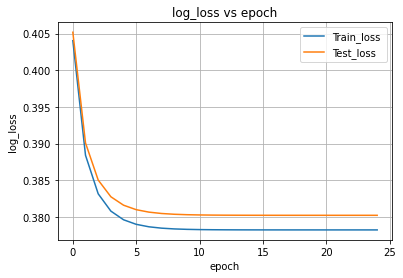

In [86]:
#plot log_loss vs epoch
import matplotlib.pyplot as plt
a=list(range(0,25))
plt.plot(a,Train_loss,label='Train_loss ')
plt.plot(a,Test_loss,label='Test_loss')
plt.xlabel("epoch")
plt.ylabel("log_loss")
plt.title("log_loss vs epoch")
plt.legend()
plt.grid()
plt.show()

In [87]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.0062903 ,  0.00751745,  0.0001633 , -0.00334019, -0.01290553,
          0.0096975 ,  0.00724019,  0.00414091,  0.01247424, -0.00709179,
          0.00162367, -0.00473617, -0.00165506,  0.00056136,  0.00029861]]),
 array([-0.03813415]))

In [88]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95224
0.95
